### **Dataset Description for Multiple Linear Regression**

**File Name:** `economic_index.csv`

**Observations:** 24 monthly observations.

**Goal:** To model and predict the economic **index price** based on key macroeconomic indicators: **interest rate** and **unemployment rate**.

#### **Variable Descriptions**

| Column Name | Data Type | Role in Regression | Description |
| :--- | :--- | :--- | :--- |
| **`index_price`** | Numeric (Integer) | **Dependent Variable (Y)** | The value of the economic index (e.g., a stock index, commodity index, etc.). This is the variable you want to predict. |
| **`interest_rate`** | Numeric (Float) | **Independent Variable (X)** | The prevailing interest rate, often used as a measure of monetary policy. |
| **`unemployment_rate`** | Numeric (Float) | **Independent Variable (X)** | The prevailing unemployment rate, a key indicator of the health of the labor market. |
| `year` | Numeric (Integer) | Contextual/Time | The year of the observation. Can be used for time-series analysis or feature engineering. |
| `month` | Numeric (Integer) | Contextual/Time | The month of the observation (1-12). Can be used for time-series analysis or feature engineering. |

#### **Proposed Regression Model**

The standard Multiple Linear Regression equation to be estimated is:

$$\hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2$$

Where:

  * $\hat{Y}$ is the predicted **`index_price`**.
  * $X_1$ is the **`interest_rate`**.
  * $X_2$ is the **`unemployment_rate`**.

Our task is to estimate the coefficients ($\beta_0, \beta_1, \beta_2$) and interpret how changes in the interest rate and unemployment rate affect the index price.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv') 

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [8]:
# Let's remove the column (unnamed, year, and month since they have no effect on the output variable index_price)

df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1, inplace=True)

In [9]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


* Why did we removed the columns `unnamed`,`year`, and `month`?

The decision to remove the `Unnamed: 0`, `year`, and `month` columns for a *simple* Multiple Linear Regression (MLR) on `index_price` is **largely correct and often a good practice**.

##### 1\. `Unnamed: 0`

This column appears to be a redundant index column generated upon saving or loading the CSV. It is purely an identifier and has no meaningful explanatory power on the `index_price`.

  * **Action:** Remove.

##### 2\. `year` and `month` 

For a standard Multiple Linear Regression, which assumes that the relationship between the independent and dependent variables is instantaneous and static, these time-based columns are typically removed for the following reasons:

  * **Avoidance of Spurious Correlation:** While the `index_price` is clearly increasing over time (as seen in the first few rows), this trend is likely driven by the underlying economic fundamentals (`interest_rate` and `unemployment_rate`) which are changing over time. Including `year` or `month` might just capture the trend, potentially making the model believe that *time itself* is a direct cause, which can lead to an oversimplified or misleading interpretation.

  * **Time-Series Assumption Violation:** Standard MLR assumes that observations are independent. Economic data, especially time-series data like this, often exhibits **autocorrelation** (the value in one month is related to the value in the previous month). Including time variables doesn't solve this; instead, it complicates the interpretation and can lead to unreliable standard errors and p-values.

  ---

In [10]:
# Let's check for null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

There are no null values since the dataset is hand-made.

---

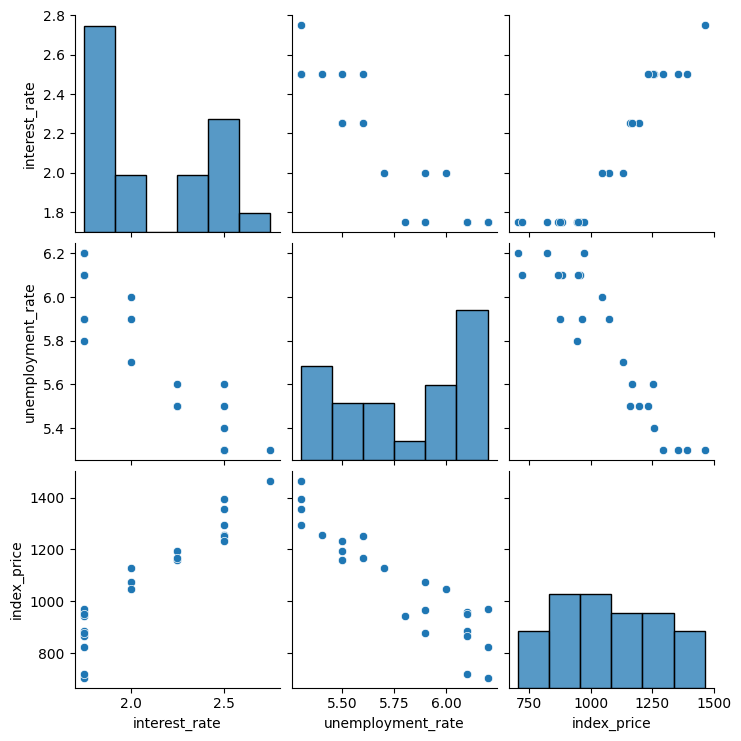

In [17]:
# Visualize the relationship between the independent and dependent variables

sns.pairplot(df_index)
plt.show()

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


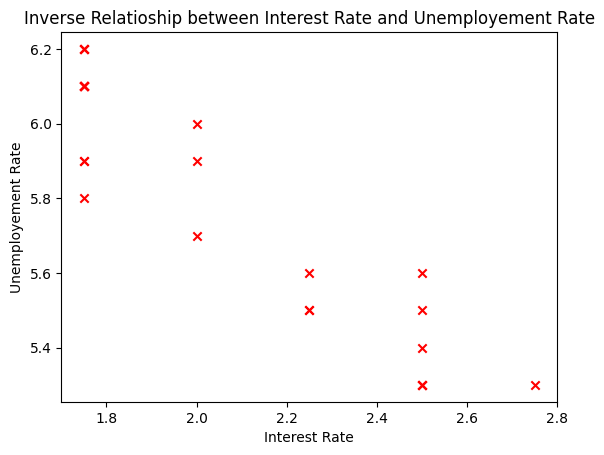

In [21]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r', marker='x')
plt.title("Inverse Relatioship between Interest Rate and Unemployement Rate")
plt.xlabel('Interest Rate')
plt.ylabel('Unemployement Rate')
plt.show()

The analysis of the relationships between the variables reveals a very strong fit potential for the Multiple Linear Regression model:

* **Index Price** (Dependent Variable) exhibits a very strong **positive** linear relationship with the **Interest Rate** ($r \approx 0.94$). This suggests that as the interest rate increases, the economic index price also tends to rise significantly.

* Conversely, **Index Price** has a very strong **negative** linear relationship with the **Unemployment Rate** ($r \approx -0.92$). This means that when the unemployment rate is high, the index price tends to be low, consistent with typical economic intuition.

* The two independent variables, **Interest Rate** and **Unemployment Rate**, are themselves strongly **negatively** correlated ($r \approx -0.93$). This high degree of inter-correlation (multicollinearity) should be noted, as it may make the individual interpretation of the regression coefficients less stable.

* Overall, the variables are highly correlated with the target, indicating a model with high predictive power.

---

In [22]:
# seperate independent (interest_rate, unemployement_rate) and dependent features (index_price) 

X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [23]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [24]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

---

In [25]:
# Train - Test Split
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'y Train: {y_train.shape}')
print(f'y Test: {y_test.shape}')

X Train: (18, 2)
X Test: (6, 2)
y Train: (18,)
y Test: (6,)


---

In [29]:
# Standardizing the input dataset 

from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [35]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

---

In [36]:
# Train the model

from sklearn.linear_model import LinearRegression

In [37]:
regression = LinearRegression()

In [38]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


---

#### Cross-Validation and `sklearn.model_selection.cross_val_score`

**What is it?**

Cross-validation is a statistical method used to estimate the skill of machine learning models on unseen data. It is a resampling procedure used to evaluate models where a fixed dataset is partitioned into multiple subsets.

**Why use it?**

The primary goal is to provide a reliable estimate of the model's performance on *new* data, minimizing the risk of:

1.  **Overfitting:** Where a model performs exceptionally well on the training data but poorly on unseen data.

2.  **Data Partition Bias:** The model's performance should not be overly dependent on a single, random train/test split. Cross-validation ensures the model is validated across different subsets of the data.

**How it works?**

The most common technique, **K-Fold Cross-Validation**, works as follows:

1.  The dataset is split into $k$ equal-sized partitions (or "folds").

2.  The model is trained $k$ times. In each iteration, one fold is reserved as the **testing set**, and the remaining $k-1$ folds are used as the **training set**.

3.  A performance score (e.g., $R^2$) is recorded for each of the $k$ iterations.

4.  The final estimated performance of the model is the **average** of the $k$ scores.

**Syntax (for `cross_val_score`)**

```python
from sklearn.model_selection import cross_val_score

# scores is an array of k scores (one for each fold)

scores = cross_val_score(estimator, X, y, cv=5, scoring='r2')
```

**Parameters (for `cross_val_score`)**

| Parameter | Description |
| :--- | :--- |
| **`estimator`** | The machine learning model/object to be evaluated (e.g., `LinearRegression()`). |
| **`X`** | The data (features) to fit the model. |
| **`y`** | The target variable (labels) for the model (`index_price` in our case). |
| **`cv`** | The number of folds ($k$) to use for cross-validation (e.g., `cv=5` is standard). |
| **`scoring`** | The metric used to evaluate the model (e.g., `'r2'`, `'neg_mean_squared_error'`, `'accuracy'`). |

**Illustration Idea**

Imagine dividing your dataset into 5 equal parts (5-Fold CV). In the first test, you train on Folds 2, 3, 4, and 5, and test on Fold 1. In the second test, you train on Folds 1, 3, 4, and 5, and test on Fold 2, and so on, until every fold has been used exactly once as the test set.

**Key points**

  * The function returns an **array of scores**, not a single model.

  * The final performance estimate is the **mean of the scores** in that array.

  * It is the standard, most robust way to assess a model's generalization ability before deploying it.

  * `cross_val_score` handles the splitting, training, and scoring automatically, simplifying the process greatly.

In [39]:
from sklearn.model_selection import cross_val_score

In [40]:
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=3)

In [41]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [43]:
np.mean(validation_score)

# This means that, on average, the model's prediction for the index_price is off by approximately $76.91$ index units when tested on unseen data subsets. This gives you a robust measure of the model's typical prediction error.

np.float64(-5914.828180162388)

---

In [44]:
# Prediction 
y_pred = regression.predict(X_test)

In [45]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

---

In [50]:
# Performance Metrices
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [47]:
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Square Error: {mse}')

Mean Square Error: 8108.567426306604


In [48]:
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 73.80444932337097


In [49]:
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 90.04758423359621


In [51]:
R2_score = r2_score(y_test, y_pred)

print(f'R2 Score: {R2_score}')

R2 Score: 0.7591371539010257


In [53]:
adj_r2 = 1 - (1-R2_score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print(f'Adjusted R2: {adj_r2}')

Adjusted R2: 0.5985619231683761


---

### Assumptions:

* 1.**Normality of Errors (N)** :

- The errors (residuals are normally distributed).

- *What it means* : When you collect all the residuals, their distribution should look like a bell curve.

In [54]:
residuals = y_test - y_pred

In [55]:
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


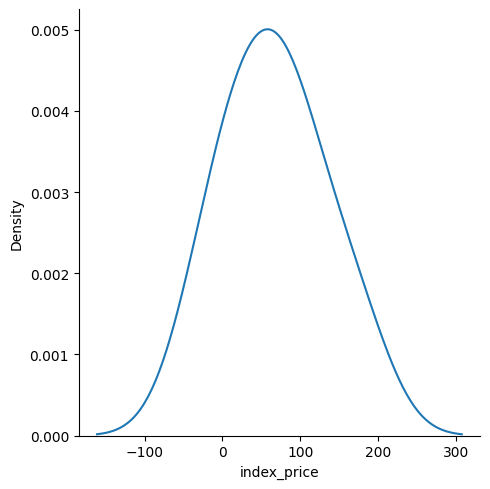

In [58]:
sns.displot(residuals, kind='kde')
plt.show()

---

* 2.**Equal variance of Errors (E)/ Homoscendasticity (H):**

- *Assumption:* The variance of the errors is constant across all levels of the independent variables. This is called *Homoscedasticity* (constant variance). The opposite is *Heteroscedasticity* (unequal variance).

- *What it means:* The spread of the residuals should be the same whether the predicted value ($\hat{Y}$) is small or large.

- *How to check:* Plot Residuals vs. Predicted Values . You should see a random cloud of points with roughly the same width (a "shotgun blast" pattern). A "funnel" or "cone" shape indicates heteroscedasticity, which can lead to inefficient coefficient estimates and unreliable standard errors.

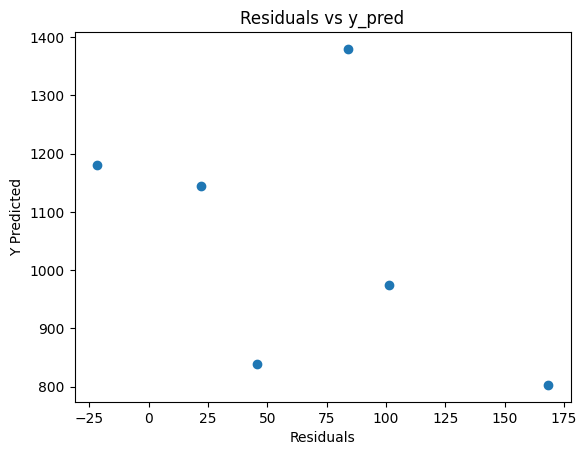

In [62]:
plt.scatter(residuals, y_pred)
plt.title('Residuals vs y_pred')
plt.xlabel('Residuals')
plt.ylabel('Y Predicted')
plt.show()

---



* **3. Linearity:**

* *Assumption:* The relationship between the predictors and the target variable is linear.

* *Observation from the Plot:* There is no clear curved pattern (like a 'U' shape or an inverted 'U' shape).

* *Conclusion:* The assumption of Linearity is likely met.

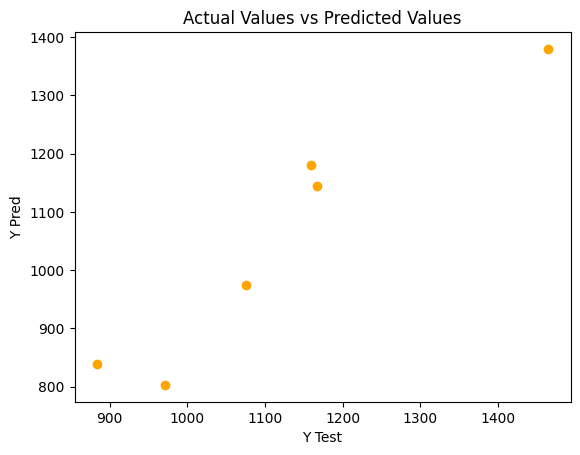

In [66]:
plt.scatter(y_test, y_pred, color='orange')
plt.title('Actual Values vs Predicted Values')
plt.xlabel('Y Test')
plt.ylabel('Y Pred')
plt.show()

---

In [67]:
# Compute ordinary list square (OLS)
import statsmodels.api as sm

In [68]:
model = sm.OLS(y_train, X_train).fit()

In [73]:
print(model.summary())
print(regression.coef_)

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 15 Dec 2025   Prob (F-statistic):                       0.754
Time:                        15:02:08   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------